Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "HENRY TAMEKLOE"
COLLABORATORS = ""

---

# Lista 04 - Teste de Hipótese

In [2]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Fixa a semente geradora de numeros aleatorios para gerar os mesmos resultados a cada execucao
np.random.seed(42)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [4]:
def q1a():
    # YOUR CODE HERE
    return [True,False,True]
    #raise NotImplementedError()

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance (TVD):

$$ \mathit{TVD}(p, q) = \frac{1}{2}|p - q| = \frac{1}{2}\sum_{i=1}^n |p_i - q_i| $$    
onde $p$ e $q$ são os vetores de proporções

In [5]:
def tvd(p, q):
    # YOUR CODE HERE
    total = np.sum(np.abs(p-q))/2
    return total
    #raise NotImplementedError()

In [6]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [7]:
def q1c():
    # YOUR CODE HERE
    pop = np.array([100/1000,600/1000,300/1000])
    samp = np.array([2000/12500,8000/12500,2500/12500])
    return tvd(pop,samp)
    #raise NotImplementedError()
q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

Por exemplo, o vetor [0, 0, 1, 1, 1, 2] representa uma população de tamanho 6, com dois elementos na classe 0, três elementos na classe 1 e um elemento na classe 2. As proporções são 2/6, 3/6 e 1/6, respectivamente.

In [8]:
def calcula_proporcao(amostra, valor):
    return sum(1 for x in amostra if x == valor) / len(amostra)

def gera_amostra(tamanho_amostra):
    # YOUR CODE HERE
    sample = np.random.choice(3, tamanho_amostra)
    u, counts  = np.unique(sample, return_counts=True)
    quantidade = np.array([0.0, 0.0, 0.0])
    poplist = dict(zip(u, counts))
    if 0 in poplist:
        quantidade[0] = poplist[0]
    if 1 in poplist:
        quantidade[1] = poplist[1]
    if 2 in poplist:
        quantidade[2] = poplist[2]
    exatas     = quantidade[0]/tamanho_amostra
    humanas    = quantidade[1]/tamanho_amostra
    biologicas = quantidade[2]/tamanho_amostra
    return [exatas, humanas, biologicas]
gera_amostra(10)
    #raise NotImplementedError()

[0.3, 0.1, 0.6]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

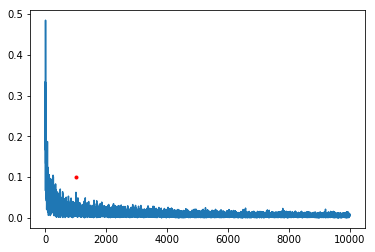

In [9]:
# YOUR CODE HERE
expected   = np.array([1/3, 1/3,1/3])
tvd_distr = []
for i in range (3, 10000):
    tvd_distr.append(tvd(gera_amostra(i), expected))

ponto = [1000, q1c()]
tvd_distr = np.array(tvd_distr)
plt.plot(tvd_distr)
plt.plot(ponto[0], ponto[1], marker='o', markersize=3, color="red")
#raise NotImplementedError()

F) Escreva uma função q1f(x) que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de x% de confiança.

__Dica__: Utilize o método baseado em boostrap, ou seja, calcule o TVD para um número grande de amostras da população, como foi feito no passo anterior. Em seguida, encontre o percentil dos TVDs calculados que corresponde ao nível de confiança de 90%.

Retorne apenas o lado direito do intervalo de confiança para o TVD.


In [ ]:
def q1f(x):
    # YOUR CODE HERE
    size     = tvd_distr.size
    tvd_ord  = np.sort(tvd_distr)
    sup      = size*x
    tvd_conf = tvd_ord[:sup]
    superior = tvd_conf[-3]    # Porque na questão acima,coloquei *100 para facilitar visualização
    return superior
    raise NotImplementedError()

In [ ]:
from numpy.testing import *
assert_almost_equal( q1f(95), 0.034, 3 )
assert_almost_equal( q1f(90), 0.031, 3 )
assert_almost_equal( q1f(80), 0.026, 3 )

# Exercício 02:

Usando os dados do arquivo ```enem2015.csv```, vamos realizar um teste por permutação.

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


A) Implemente uma função que retorne a diferença entre a média das notas das escolas públicas federais e a média das notas de  escolas privadas. Exemplo:

```python
def q2a(df):
    media_federal = 631.0
    media_particular = 620.0
    return 11.0
```

In [33]:
def q2a(df):
    # YOUR CODE HERE
    federal = df['NOTA_MEDIA_ESCOLA'].loc[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal'].mean()
    privada = df['NOTA_MEDIA_ESCOLA'].loc[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Privada'].mean()
    return federal-privada
    #raise NotImplementedError()
q2a(df)

9.21003744957261

B) Realize permutações com os rótulos (Federal / Privada), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias notas, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

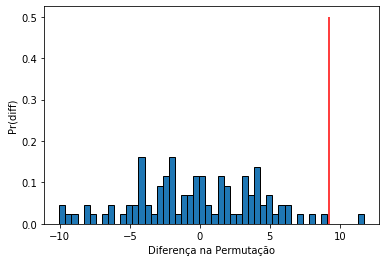

In [34]:
from IPython.display import Image
Image('100permutacoes.png')

In [ ]:
# YOUR CODE HERE
permutations = np.array([10,100,500, 1000, 5000])

for i in permutations:
    dif = []
    for j in range(i):
        difference = (df.sample().iloc[0]['NOTA_MEDIA_ESCOLA'] - df.sample().iloc[0]['NOTA_MEDIA_ESCOLA'])/50
        dif.append(difference)
    dif_df = pd.DataFrame(dif)
    plt.hist(dif_df,bins=50,edgecolor='k')
    plt.suptitle(i, x=0.5, y=1.05, ha='center', fontsize='xx-large')
    plt.axvline(q2a(df), color='red')
#raise NotImplementedError()

B) Escreva abaixo o que você observou com os gráficos.

YOUR ANSWER HERE

As we are increasing the number of permutations,we aproximate the normal. And also with much data, we can say much about the distribution of the population.